## AnimeWorld - Part 1 EDA

A blog will be shared soon on Recommendation System in detail. Join our Discord Community to stay updated.


<a href="https://discord.com/invite/kxZYxdTKp6">
<img src="https://discord.com/api/guilds/939520548726272010/widget.png?style=banner1"></a>
    

This notebook is divided into two parts:
- Part 1- EDA
- Part 2- Recommendation Engine System

Note: This dataset currently only contains 2015-2020 active Anime. I shall soon add more data starting from 2000. So stay updated by joining our Discord Server

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("AnimeWorld.csv")

In [3]:
data.sample(10)   #display random 10 data

,Unnamed: 0,Anime,Genre,Description,Studio,Year,Rating
606,45,Kaito x Ansa,[],Second season of Nazotokine.,Tengu Kobo,"Jul 12, 2017",NaN
6,6,Great Pretender,"['Action', 'Adventure', 'Mystery']",A series of unfortunate events has led Makoto ...,Wit Studio,"Jul 9, 2020",8.26
504,17,Urara Meirochou,"['Comedy', 'Fantasy', 'Slice of Life']",Labyrinth Town is a legendary city composed of...,J.C.Staff,"Jan 6, 2017",NaN
65,65,Ma-eum-uisoli Season 2,"['Comedy', 'Slice of Life']",Second season of Ma-eum-uisoli.,NaN,"May 19, 2020",NaN
203,59,Yu☆Gi☆Oh! VRAINS,"['Action', 'Fantasy', 'Sci-Fi']",The world of Duel Monsters is once again evolv...,Gallop,"May 10, 2017",NaN
956,50,Deban Desu Yo! Onigirizu,Comedy,A short series created to commemorate the 25th...,Production Reed,"Jun 1, 2015",NaN
919,12,Gakkougurashi!,"['Horror', 'Mystery', 'Slice of Life']",Carefree high school junior Yuki Takeya every ...,Lerche,"Jul 9, 2015",NaN
519,32,Schoolgirl Strikers: Animation Channel,"['Action', 'Sci-Fi']",It's the near future. The newly established gi...,J.C.Staff,"Jan 7, 2017",NaN
662,62,Otona no Ikkyuu-san 2nd Season,Comedy,The second season of Otona no Ikkyuu-san.,Historical,"Apr 4, 2017",NaN
275,7,Isekai Quartet,"['Comedy', 'Fantasy']",It is a normal day; everyone from deranged mil...,Studio PuYUKAI,"Apr 10, 2019",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1005 non-null   int64  
 1   Anime        1005 non-null   object 
 2   Genre        1005 non-null   object 
 3   Description  1005 non-null   object 
 4   Studio       977 non-null    object 
 5   Year         1005 non-null   object 
 6   Rating       97 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 55.1+ KB


### Step 1: Perform EDA: Exploratory Data Analysis

<AxesSubplot:>

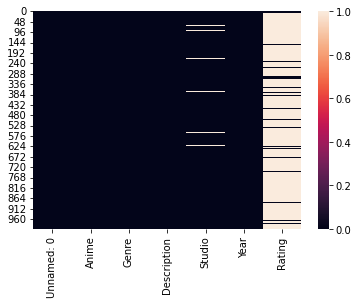

In [5]:
sns.heatmap(data.isnull())

In [6]:
#Let us drop Unnamed: 0 column
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Anime        1005 non-null   object 
 1   Genre        1005 non-null   object 
 2   Description  1005 non-null   object 
 3   Studio       977 non-null    object 
 4   Year         1005 non-null   object 
 5   Rating       97 non-null     float64
dtypes: float64(1), object(5)
memory usage: 47.2+ KB


In [8]:
data['Studio'].nunique()

209

In [9]:
ratings = data['Rating']

In [10]:
ratings.dropna(inplace=True)

In [11]:
data.groupby("Rating")["Anime"].max().iloc[-5:]

Rating
8.81                                   Mob Psycho 100 II
8.88    Gintama.: Shirogane no Tamashii-hen - Kouhan-sen
8.90                          Owarimonogatari 2nd Season
8.95                          3-gatsu no Lion 2nd Season
8.99                                            Gintama.
Name: Anime, dtype: object

<AxesSubplot:xlabel='Rating', ylabel='Count'>

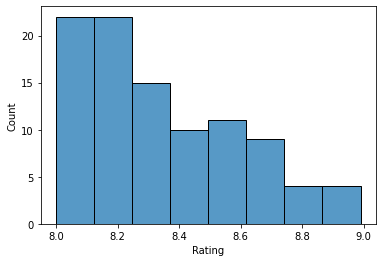

In [12]:
sns.histplot(data=ratings)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Anime        1005 non-null   object 
 1   Genre        1005 non-null   object 
 2   Description  1005 non-null   object 
 3   Studio       977 non-null    object 
 4   Year         1005 non-null   object 
 5   Rating       97 non-null     float64
dtypes: float64(1), object(5)
memory usage: 47.2+ KB


### Parse the Date from Object to Datetime

In [14]:
data['Year'] = pd.to_datetime(data['Year'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Anime        1005 non-null   object        
 1   Genre        1005 non-null   object        
 2   Description  1005 non-null   object        
 3   Studio       977 non-null    object        
 4   Year         1005 non-null   datetime64[ns]
 5   Rating       97 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.2+ KB


In [16]:
data['Release year'] = data['Year'].dt.year
data['Release Month'] = data['Year'].dt.month

In [17]:
data.sample(5)

,Anime,Genre,Description,Studio,Year,Rating,Release year,Release Month
886,Garo: Honoo no Kokuin,"['Action', 'Fantasy', 'Supernatural']","In the name of the king, the Valiante Kingdom ...",MAPPA,2014-10-04,NaN,2014,10
385,High Score Girl,Comedy,"The year is 1991, and arcade video games are t...",J.C.Staff,2018-07-14,NaN,2018,7
242,Cop Craft,"['Action', 'Fantasy', 'Sci-Fi']","Fifteen years ago, a hyperspace gate appeared ...",Millepensee,2019-07-09,NaN,2019,7
848,Durarara!!x2 Shou,"['Action', 'Mystery', 'Supernatural']",Although peace has finally returned to Ikebuku...,Shuka,2015-01-10,NaN,2015,1
528,Chou Shounen Tanteidan Neo,Mystery,The series will follow the descendant of Kobay...,DLE,2017-01-02,NaN,2017,1


Text(0.5, 0, 'Release Month')

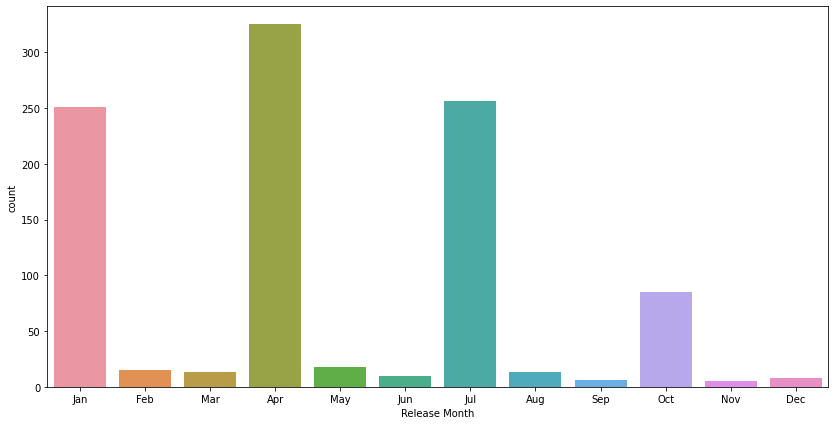

In [18]:
plt.figure(figsize=(14,7))
sns.countplot(data=data,x="Release Month")
plt.xticks(ticks = range(12),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Release Month")

##### By above graph we can conclude that April Month release more number of Anime

<AxesSubplot:xlabel='Release year', ylabel='count'>

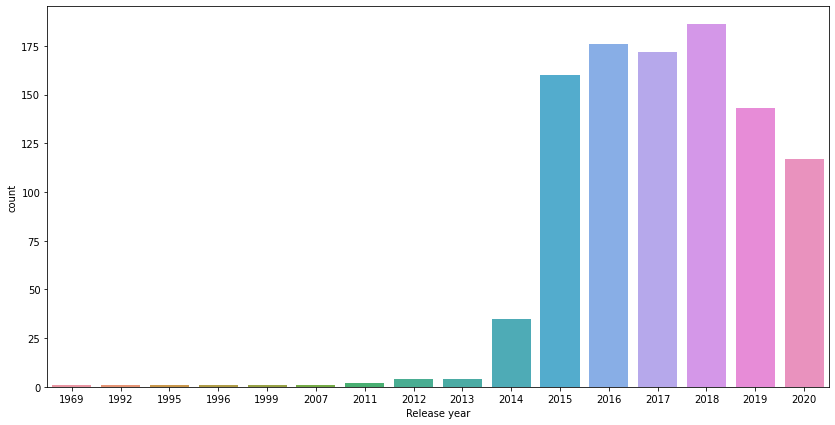

In [19]:
plt.figure(figsize=(14,7))
sns.countplot(data=data,x="Release year")

Now you might be wondering when the dataset was supposed to be last 5 years then why is 1969 showing or why is 1969-2014 available in the dataset.This is because few old Anime were active in last 5 years and is still successfully running e.g., One Piece

2018 was a Good Year for new Animes

### Studio with More number of Anime

In [35]:
data.groupby("Studio")['Anime'].count().sort_values(ascending=False).iloc[:5]

Studio
A-1 Pictures         38
J.C.Staff            35
Studio Deen          31
OLM                  29
TMS Entertainment    27
Name: Anime, dtype: int64

<AxesSubplot:ylabel='Studio'>

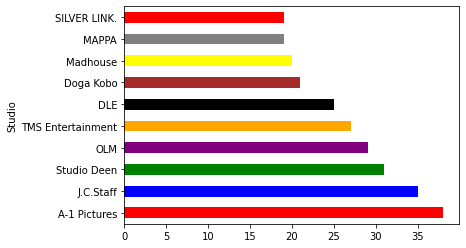

In [46]:
color = ['red','blue','green','purple','orange','black','brown','yellow','grey']
data.groupby("Studio")['Anime'].count().sort_values(ascending=False).iloc[:10].plot(kind="barh",color=color)

### Lets Look At Genre

In [87]:
genre = data['Genre']

In [93]:
set(genre)

{'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Slice of Life',
 'Sports',
 'Supernatural',
 "['Action', 'Adventure', 'Comedy', 'Drama', 'Supernatural']",
 "['Action', 'Adventure', 'Comedy', 'Drama']",
 "['Action', 'Adventure', 'Comedy', 'Fantasy', 'Romance']",
 "['Action', 'Adventure', 'Comedy', 'Fantasy', 'Sci-Fi']",
 "['Action', 'Adventure', 'Comedy', 'Fantasy']",
 "['Action', 'Adventure', 'Comedy', 'Mystery']",
 "['Action', 'Adventure', 'Comedy', 'Sci-Fi']",
 "['Action', 'Adventure', 'Comedy', 'Supernatural']",
 "['Action', 'Adventure', 'Comedy']",
 "['Action', 'Adventure', 'Drama', 'Fantasy', 'Horror', 'Supernatural']",
 "['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery']",
 "['Action', 'Adventure', 'Drama', 'Fantasy', 'Supernatural']",
 "['Action', 'Adventure', 'Drama', 'Fantasy']",
 "['Action', 'Adventure', 'Drama', 'Mystery']",
 "['Action', 'Adventure', 'Drama', 'Supernatural']",
 "['Action', 'Adventure', 'Drama']",


PART 2: RECOMMENDATION SYSTEM- coming soon

GitHub: [Tarun R Jain](https://github.com/lucifertrj)